In [2]:
import matplotlib.pyplot as plt
import numpy as np

import sys
import os

script_directory = os.path.abspath(os.path.join('..', 'evaluation'))
sys.path.append(script_directory)

from prediction_reader import score_result

[08:53:22] Initializing Normalizer


In [3]:
def multi_boxplot(data, xlabel, ylabel, xticks, labels, location, save_figure=None, ylim=None):
    
    plt.rcParams.update({"font.size": 12, "font.family": "serif", "font.serif": ["NewComputerModern10"]})
    # plt.rcParams.update({'font.size': 12, 'font.family': 'sans-serif'})

    plt.figure(figsize=(6, 3))

    # colour_scheme = ['lightblue', 'orange', 'mediumseagreen', 'orchid']
    colour_scheme = ['#52B297', '#8E4A93', '#009EE7', '#EF766E']

    # Set the width of each box
    box_width = 0.2


    for i in range(len(data)):
        boxprops = dict(linestyle='-', linewidth=1, color='black', facecolor=colour_scheme[i])
        medianprops = dict(linestyle='--', linewidth=1, color='none')
        meanprops = dict(linestyle='-', linewidth=1, color='black')

        plt.boxplot(data[i], positions=np.arange(len(data[i])) + i * box_width, widths=box_width, patch_artist=True,
                    boxprops=boxprops, showmeans=True, meanline=True, medianprops=medianprops, meanprops=meanprops, label=labels[i])
        

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    central_positions = np.arange(len(data[0])) + (len(data) * box_width / 2) - (box_width / 2)
    plt.xticks(central_positions, xticks)
    
    if ylim is not None:
        plt.ylim(-0.005, ylim)
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    if location is not None:
        plt.legend(loc=location)
        # plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(data), frameon=False)

    if save_figure is not None:
        os.makedirs('figures', exist_ok=True)
        plt.savefig(f'figures/{save_figure}.eps', format='eps')

    
    plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


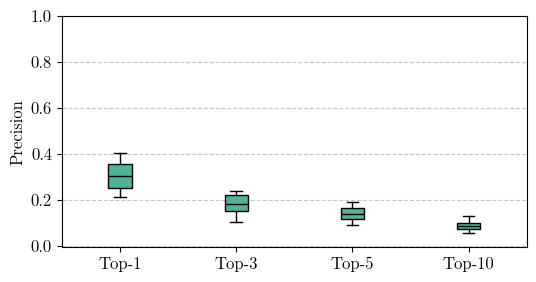

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


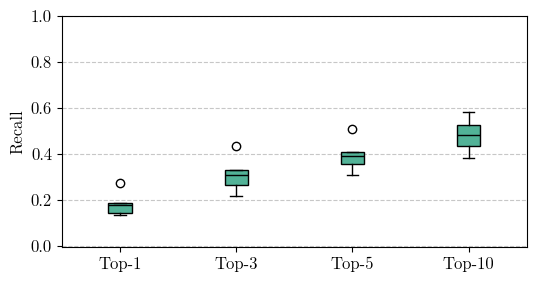

In [28]:
bs = 4

recall_base, precision_base, score_one_base, score_all_base = score_result('../evaluation/alohomora/result_chemf_base_metabolic.csv', bs, False)


precision = [precision_base[0:4]]
recall = [recall_base[0:4]]
score_one = [score_one_base[0:4]]
score_all = [score_all_base[0:4]]

xlabel = None
xticks = ['Top-1', 'Top-3', 'Top-5', 'Top-10']
labels = ['Chemf Base']

ylabel = 'Precision'
multi_boxplot(precision, xlabel, ylabel, xticks, labels, None, 'chemf_precision', 1)

ylabel = 'Recall'
multi_boxplot(recall, xlabel, ylabel, xticks, labels, None, 'chemf_recall', 1)

# ylabel = 'At Least One Metabolite'
# multi_boxplot(score_one, xlabel, ylabel, xticks, labels, 'upper left', 'at_least_chemVA', 0.5)

# ylabel = 'All Metabolites'
# multi_boxplot(score_all, xlabel, ylabel, xticks, labels, 'upper left', 'all_chemVA', 0.5)


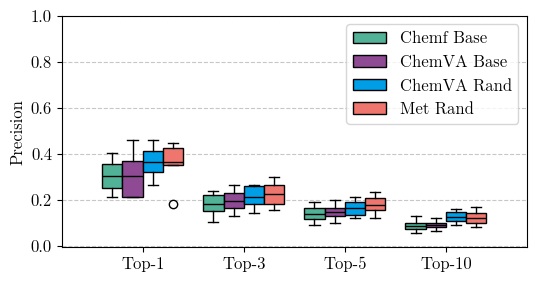

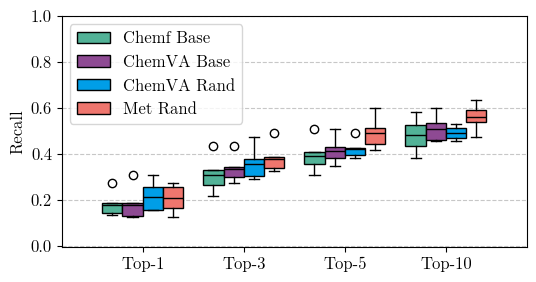

In [23]:
bs = 4

recall_base, precision_base, score_one_base, score_all_base = score_result('../evaluation/alohomora/result_chemf_base_metabolic.csv', bs, False)
recall_ChemVA_base, precision_ChemVA_base, score_one_ChemVA_base, score_all_ChemVA_base = score_result('../evaluation/alohomora/result_base.csv', bs, False)
recall_ChemVA_rand, precision_ChemVA_rand, score_one_ChemVA_rand, score_all_ChemVA_rand = score_result('../evaluation/alohomora/result_base_rand.csv', bs, False)
recall_metatrans, precision_metatrans, score_one_metatrans, score_all_metatrans = score_result('../evaluation/alohomora/result_metatrans.csv', bs, False)


precision = [precision_base[0:4], precision_ChemVA_base[0:4], precision_ChemVA_rand[0:4], precision_metatrans[0:4]]
recall = [recall_base[0:4], recall_ChemVA_base[0:4], recall_ChemVA_rand[0:4], recall_metatrans[0:4]]
score_one = [score_one_base[0:4], score_one_ChemVA_base[0:4], score_one_ChemVA_rand[0:4], score_one_metatrans[0:4]]
score_all = [score_all_base[0:4], score_all_ChemVA_base[0:4], score_all_ChemVA_base[0:4], score_all_metatrans[0:4]]

xlabel = None
xticks = ['Top-1', 'Top-3', 'Top-5', 'Top-10']
labels = ['Chemf Base', 'ChemVA Base', 'ChemVA Rand', 'Met Rand']

ylabel = 'Precision'
multi_boxplot(precision, xlabel, ylabel, xticks, labels, 'upper right', None, 1)

ylabel = 'Recall'
multi_boxplot(recall, xlabel, ylabel, xticks, labels, 'upper left', None, 1)

# ylabel = 'At Least One Metabolite'
# multi_boxplot(score_one, xlabel, ylabel, xticks, labels, 'upper left', 'at_least_chemVA', 0.5)

# ylabel = 'All Metabolites'
# multi_boxplot(score_all, xlabel, ylabel, xticks, labels, 'upper left', 'all_chemVA', 0.5)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


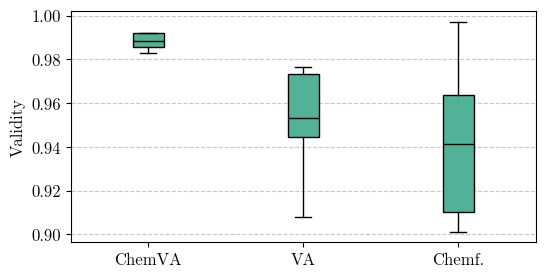

In [75]:
# Validity comparison plot

VA_comb = [0.9763157894736842, 0.9723684210526315, 0.9078947368421053, 0.9567567567567568]

'''
Validity: 0.953 +/- 0.001
Mean number of SMILES per drug: 16.117 +/- 0.161 / 20

Total identified metabolites: 24 / 271
Total number of predictions: 2434
'''

chemVA_comb = [0.9921052631578947, 0.9828947368421053, 0.9868421052631579, 0.9918918918918919]

'''
Validity: 0.988 +/- 0.000
Mean number of SMILES per drug: 14.461 +/- 0.085 / 20

Total identified metabolites: 37 / 271
Total number of predictions: 2184
'''

chemf_comb = [0.9131578947368421, 0.9013157894736842, 0.9526315789473684, 0.9972972972972973]

'''
Validity: 0.941 +/- 0.002
Mean number of SMILES per drug: 2.247 +/- 0.298 / 20

Total identified metabolites: 0 / 271
Total number of predictions: 340
'''

comb = [chemVA_comb, VA_comb, chemf_comb]

data = [comb]

xlabel = None
ylabel = 'Validity'
xticks = ['ChemVA', 'VA', 'Chemf.']
labels = ['comb', 'rand', 'base', 'mask']

multi_boxplot(data, xlabel, ylabel, xticks, labels, None, 'validity')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


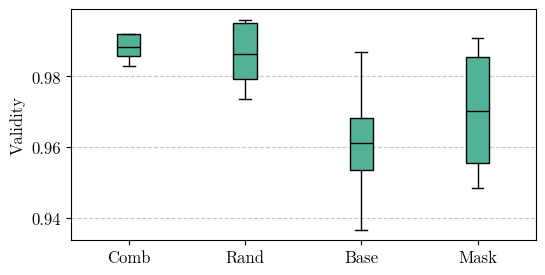

In [76]:
# Validity variants comparison plot

chemVA_comb = [0.9921052631578947, 0.9828947368421053, 0.9868421052631579, 0.9918918918918919]

'''
Validity: 0.988 $\pm$ 0.000
Mean number of SMILES per drug: 14.461 $\pm$ 0.085 / 20

Total identified metabolites: 37 / 271
Total number of predictions: 2184
'''

chemVA_mask = [0.9907894736842106, 0.9486842105263158, 0.9578947368421052, 0.9837837837837838]

'''
Validity: 0.970 $\pm$ 0.000
Mean number of SMILES per drug: 18.273 $\pm$ 0.091 / 20

Total identified metabolites: 37 / 271
Total number of predictions: 2759
'''

chemVA_rand = [0.9960526315789474, 0.9947368421052631, 0.9736842105263158, 0.981081081081081]

'''
Validity: 0.986 $\pm$ 0.000
Mean number of SMILES per drug: 14.352 $\pm$ 0.437 / 20

Total identified metabolites: 34 / 271
Total number of predictions: 2168
'''

chemVA_base = [0.9868421052631579, 0.9592105263157895, 0.9368421052631579, 0.9621621621621622]

'''
Validity: 0.961 $\pm$ 0.000
Mean number of SMILES per drug: 17.958 $\pm$ 0.246 / 20

Total identified metabolites: 40 / 271
Total number of predictions: 2712
'''

comb = [chemVA_comb, chemVA_rand, chemVA_base, chemVA_mask]

data = [comb]

xlabel = None
ylabel = 'Validity'
xticks = ['Comb', 'Rand', 'Base', 'Mask']
labels = ['comb', 'rand', 'base', 'mask']

multi_boxplot(data, xlabel, ylabel, xticks, labels, None, 'validity_variants')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


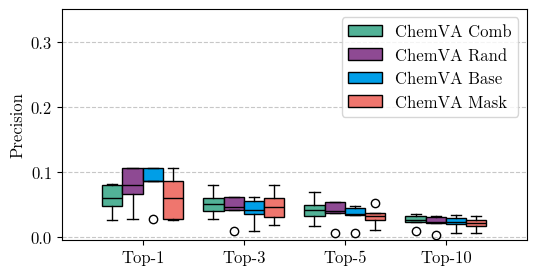

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


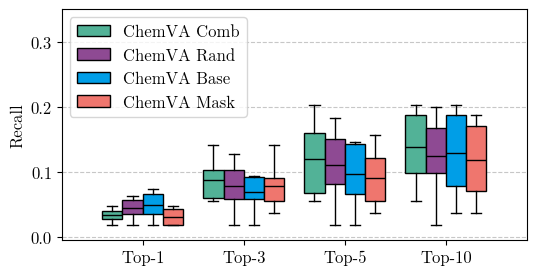

In [77]:
# ChemVA variants
bs = 4

recall_comb, precision_comb, score_one_comb, score_all_comb = score_result('../evaluation/alohomora/result_chemVA_comb.csv', bs, False)
recall_rand, precision_rand, score_one_rand, score_all_rand = score_result('../evaluation/alohomora/result_chemVA_rand.csv', bs, False)
recall_base, precision_base, score_one_base, score_all_base = score_result('../evaluation/alohomora/result_chemVA_base.csv', bs, False)
recall_mask, precision_mask, score_one_mask, score_all_mask = score_result('../evaluation/alohomora/result_chemVA_mask.csv', bs, False)

precision = [precision_comb[0:4], precision_rand[0:4], precision_base[0:4], precision_mask[0:4]]
recall = [recall_comb[0:4], recall_rand[0:4], recall_base[0:4], recall_mask[0:4]]
score_one = [score_one_comb[0:4], score_one_rand[0:4], score_one_base[0:4], score_one_mask[0:4]]
score_all = [score_all_comb[0:4], score_all_rand[0:4], score_all_base[0:4], score_all_mask[0:4]]

xlabel = None
xticks = ['Top-1', 'Top-3', 'Top-5', 'Top-10']
labels = ['ChemVA Comb', 'ChemVA Rand', 'ChemVA Base', 'ChemVA Mask']

ylabel = 'Precision'
multi_boxplot(precision, xlabel, ylabel, xticks, labels, 'upper right', 'chemVA_precision', 0.35)

ylabel = 'Recall'
multi_boxplot(recall, xlabel, ylabel, xticks, labels, 'upper left', 'chemVA_recall', 0.35)

# ylabel = 'At Least One Metabolite'
# multi_boxplot(score_one, xlabel, ylabel, xticks, labels, 'upper left', 'at_least_chemVA', 0.5)

# ylabel = 'All Metabolites'
# multi_boxplot(score_all, xlabel, ylabel, xticks, labels, 'upper left', 'all_chemVA', 0.5)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


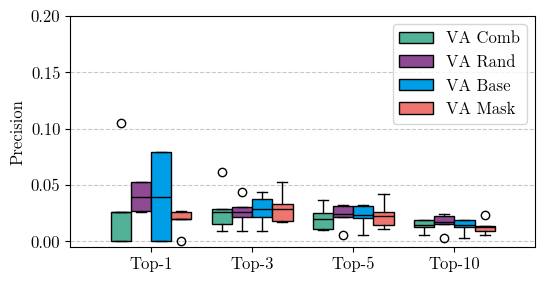

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


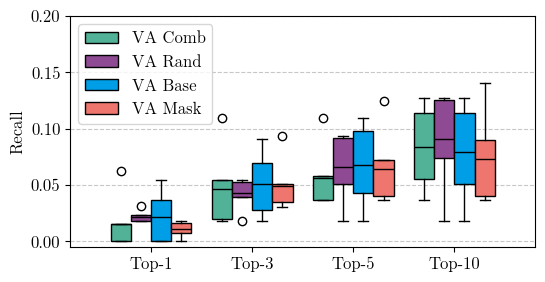

In [78]:
# VA variants
bs = 4

recall_comb, precision_comb, score_one_comb, score_all_comb = score_result('../evaluation/alohomora/result_VA_comb.csv', bs, False)
recall_rand, precision_rand, score_one_rand, score_all_rand = score_result('../evaluation/alohomora/result_VA_rand.csv', bs, False)
recall_base, precision_base, score_one_base, score_all_base = score_result('../evaluation/alohomora/result_VA_base.csv', bs, False)
recall_mask, precision_mask, score_one_mask, score_all_mask = score_result('../evaluation/alohomora/result_VA_mask.csv', bs, False)

precision = [precision_comb[0:4], precision_rand[0:4], precision_base[0:4], precision_mask[0:4]]
recall = [recall_comb[0:4], recall_rand[0:4], recall_base[0:4], recall_mask[0:4]]
score_one = [score_one_comb[0:4], score_one_rand[0:4], score_one_base[0:4], score_one_mask[0:4]]
score_all = [score_all_comb[0:4], score_all_rand[0:4], score_all_base[0:4], score_all_mask[0:4]]

xlabel = None
xticks = ['Top-1', 'Top-3', 'Top-5', 'Top-10']
labels = ['VA Comb', 'VA Rand', 'VA Base', 'VA Mask']

ylabel = 'Precision'
multi_boxplot(precision, xlabel, ylabel, xticks, labels, 'upper right', 'VA_precision', 0.2)

ylabel = 'Recall'
multi_boxplot(recall, xlabel, ylabel, xticks, labels, 'upper left', 'VA_recall', 0.2)

# ylabel = 'At Least One Metabolite'
# multi_boxplot(score_one, xlabel, ylabel, xticks, labels, 'upper left', 'at_least_VA', 0.3)

# ylabel = 'All Metabolites'
# multi_boxplot(score_all, xlabel, ylabel, xticks, labels, 'upper left', 'all_VA', 0.3)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


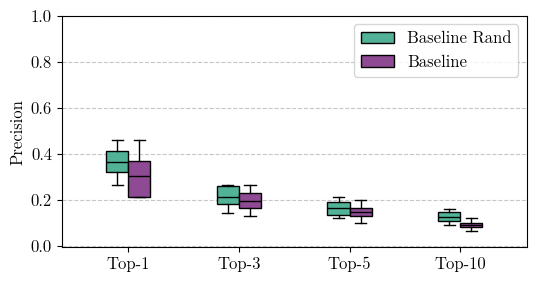

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


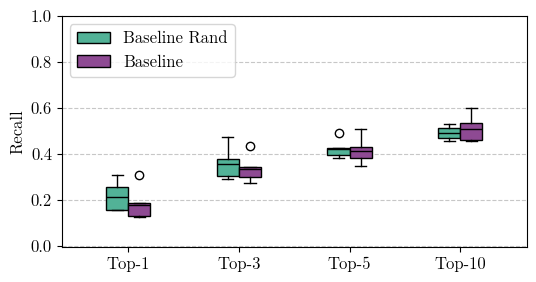

In [79]:
# Baseline comparison
bs = 4

recall_base, precision_base, score_one_base, score_all_base = score_result('../evaluation/alohomora/result_base_rand.csv', bs, False)
recall_baseline, precision_baseline, score_one_baseline, score_all_baseline = score_result('../evaluation/alohomora/result_base.csv', bs, False)

precision = [precision_base[0:4], precision_baseline[0:4]]
recall = [recall_base[0:4], recall_baseline[0:4]]
score_one = [score_one_base[0:4], score_one_baseline[0:4]]
score_all = [score_all_base[0:4], score_all_baseline[0:4]]

xlabel = None
xticks = ['Top-1', 'Top-3', 'Top-5', 'Top-10']
labels = ['Baseline Rand', 'Baseline']

ylabel = 'Precision'
multi_boxplot(precision, xlabel, ylabel, xticks, labels, 'upper right', 'baseline_precision', 1)

ylabel = 'Recall'
multi_boxplot(recall, xlabel, ylabel, xticks, labels, 'upper left', 'baseline_recall', 1)

# ylabel = 'At Least One Metabolite'
# multi_boxplot(score_one, xlabel, ylabel, xticks, labels, 'lower right', 'at_least_baseline', 0.85)

# ylabel = 'All Metabolites'
# multi_boxplot(score_all, xlabel, ylabel, xticks, labels, 'upper left', 'all_baseline', 0.85)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


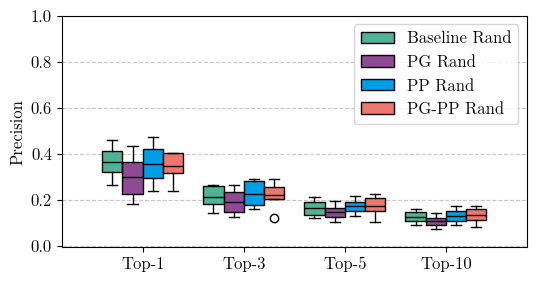

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


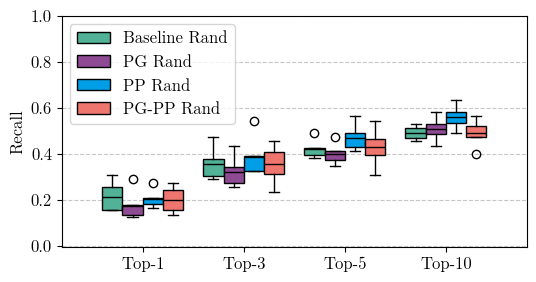

In [80]:
# Augmented Data Comparison
bs = 4

recall_base, precision_base, score_one_base, score_all_base = score_result('../evaluation/alohomora/result_base_rand.csv', bs, False)
recall_PG, precision_PG, score_one_PG, score_all_PG = score_result('../evaluation/alohomora/result_PG_rand.csv', bs, False)
recall_PP, precision_PP, score_one_PP, score_all_PP = score_result('../evaluation/alohomora/result_PP_rand.csv', bs, False)
recall_PG_PP, precision_PG_PP, score_one_PG_PP, score_all_PG_PP = score_result('../evaluation/alohomora/result_PG-PP_rand.csv', bs, False)

precision = [precision_base[0:4], precision_PG[0:4], precision_PP[0:4], precision_PG_PP[0:4]]
recall = [recall_base[0:4], recall_PG[0:4], recall_PP[0:4], recall_PG_PP[0:4]]
score_one = [score_one_base[0:4], score_one_PG[0:4], score_one_PP[0:4], score_one_PG_PP[0:4]]
score_all = [score_all_base[0:4], score_all_PG[0:4], score_all_PP[0:4], score_all_PG_PP[0:4]]

xlabel = None
xticks = ['Top-1', 'Top-3', 'Top-5', 'Top-10']
labels = ['Baseline Rand', 'PG Rand', 'PP Rand', 'PG-PP Rand']

ylabel = 'Precision'
multi_boxplot(precision, xlabel, ylabel, xticks, labels, 'upper right', 'aug_data_precision', 1)

ylabel = 'Recall'
multi_boxplot(recall, xlabel, ylabel, xticks, labels, 'upper left', 'aug_data_recall', 1)

# ylabel = 'At Least One Metabolite'
# multi_boxplot(score_one, xlabel, ylabel, xticks, labels, 'lower right', 'at_least_added_data', 1)

# ylabel = 'All Metabolites'
# multi_boxplot(score_all, xlabel, ylabel, xticks, labels, 'upper left', 'all_added_data', 1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


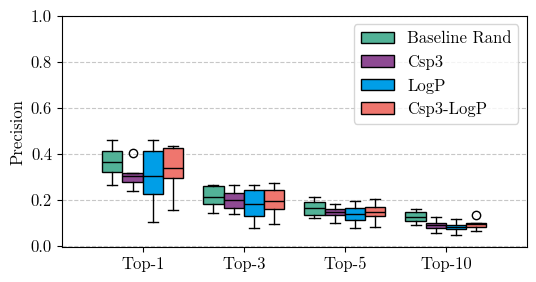

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


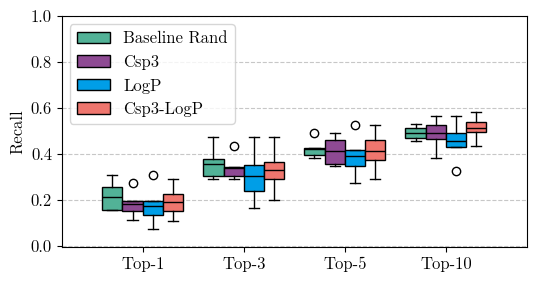

In [81]:
# Annotated Data Comparison
bs = 4

recall_base, precision_base, score_one_base, score_all_base = score_result('../evaluation/alohomora/result_base_rand.csv', bs, False)
recall_csp3, precision_csp3, score_one_csp3, score_all_csp3 = score_result('../evaluation/alohomora/result_csp3.csv', bs, False)
recall_logp, precision_logp, score_one_logp, score_all_logp = score_result('../evaluation/alohomora/result_logp.csv', bs, False)
recall_csp3_logp, precision_csp3_logp, score_one_csp3_logp, score_all_csp3_logp = score_result('../evaluation/alohomora/result_logp-csp3.csv', bs, False)

precision = [precision_base[0:4], precision_csp3[0:4], precision_logp[0:4], precision_csp3_logp[0:4]]
recall = [recall_base[0:4], recall_csp3[0:4], recall_logp[0:4], recall_csp3_logp[0:4]]
score_one = [score_one_base[0:4], score_one_csp3[0:4], score_one_logp[0:4], score_one_csp3_logp[0:4]]
score_all = [score_all_base[0:4], score_all_csp3[0:4], score_all_logp[0:4], score_all_csp3_logp[0:4]]

xlabel = None
xticks = ['Top-1', 'Top-3', 'Top-5', 'Top-10']
labels = ['Baseline Rand', 'Csp3', 'LogP', 'Csp3-LogP']

ylabel = 'Precision'
multi_boxplot(precision, xlabel, ylabel, xticks, labels, 'upper right', 'annot_data_precision', 1)

ylabel = 'Recall'
multi_boxplot(recall, xlabel, ylabel, xticks, labels, 'upper left', 'annot_data_recall', 1)

# ylabel = 'At Least One Metabolite'
# multi_boxplot(score_one, xlabel, ylabel, xticks, labels, 'lower right', 'at_least_annot_data', 1)

# ylabel = 'All Metabolites'
# multi_boxplot(score_all, xlabel, ylabel, xticks, labels, 'upper left', 'all_annot_data', 1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


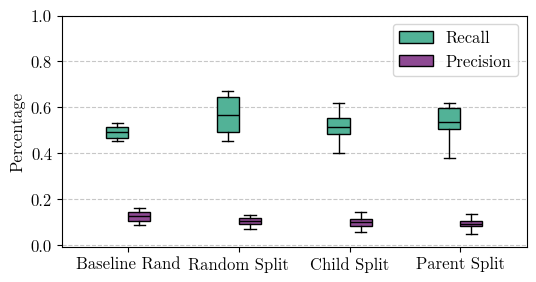

In [82]:
# Ensemble
bs = 4

recall_base, precision_base, score_one_base, score_all_base = score_result('../evaluation/alohomora/result_base_rand.csv', bs, False)
recall_random, precision_random, score_one_random, score_all_random = score_result('../evaluation/alohomora/result_comb_random_split_5_per_model.csv', bs, False)
recall_child, precision_child, score_one_child, score_all_child = score_result('../evaluation/alohomora/result_comb_child_split_3_per_model.csv', bs, False)
recall_parent, precision_parent, score_one_parent, score_all_parent = score_result('../evaluation/alohomora/result_comb_parent_split_4_per_model.csv', bs, False)

recall_all = [recall_base[-2], recall_random[-1], recall_child[-1], recall_parent[-1]]
precision_all = [precision_base[-2], precision_random[-1], precision_child[-1], precision_parent[-1]]
score_one_all = [score_one_base[-2], score_one_random[-1], score_one_child[-1], score_one_parent[-1]]
score_all_all = [score_all_base[-2], score_all_random[-1], score_all_child[-1], score_all_parent[-1]]

xlabel = None
xticks = ['Baseline Rand', 'Random Split', 'Child Split', 'Parent Split']
labels = ['Recall', 'Precision']

data = [recall_all, precision_all]
ylabel = 'Percentage'
multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper right', 'ensemble', 1)

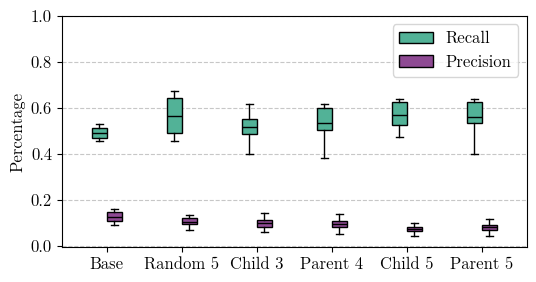

In [83]:
bs = 4

recall_base, precision_base, score_one_base, score_all_base = score_result('../evaluation/alohomora/result_base_rand.csv', bs, False)
recall_random, precision_random, score_one_random, score_all_random = score_result('../evaluation/alohomora/result_comb_random_split_5_per_model.csv', bs, False)
recall_child, precision_child, score_one_child, score_all_child = score_result('../evaluation/alohomora/result_comb_child_split_3_per_model.csv', bs, False)
recall_parent, precision_parent, score_one_parent, score_all_parent = score_result('../evaluation/alohomora/result_comb_parent_split_4_per_model.csv', bs, False)
recall_child_5, precision_child_5, score_one_child_5, score_all_child_5 = score_result('../evaluation/alohomora/result_comb_child_split_5_per_model.csv', bs, False)
recall_parent_5, precision_parent_5, score_one_parent_5, score_all_parent_5 = score_result('../evaluation/alohomora/result_comb_parent_split_5_per_model.csv', bs, False)

recall_all = [recall_base[-2], recall_random[-1], recall_child[-1], recall_parent[-1], recall_child_5[-1], recall_parent_5[-1]]
precision_all = [precision_base[-2], precision_random[-1], precision_child[-1], precision_parent[-1], precision_child_5[-1], precision_parent_5[-1]]
# score_one_all = [score_one_base[-2], score_one_random[-1], score_one_child[-1], score_one_parent[-1]]
# score_all_all = [score_all_base[-2], score_all_random[-1], score_all_child[-1], score_all_parent[-1]]

xlabel = None
xticks = ['Base', 'Random 5', 'Child 3', 'Parent 4', 'Child 5', 'Parent 5']
labels = ['Recall', 'Precision']

data = [recall_all, precision_all]
ylabel = 'Percentage'
multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper right', None, 1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


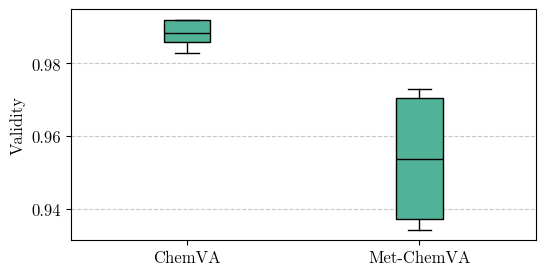

In [84]:
# Validity Meta
meta = [0.9697368421052631, 0.9342105263157895, 0.9381578947368421, 0.972972972972973]

'''
Validity: 0.954 +/- 0.000
Mean number of SMILES per drug: 11.954 +/- 1.784 / 20

Total identified metabolites: 60 / 271
Total number of predictions: 1807
'''

chemVA_comb = [0.9921052631578947, 0.9828947368421053, 0.9868421052631579, 0.9918918918918919]

'''
Validity: 0.988 +/- 0.000
Mean number of SMILES per drug: 14.461 +/- 0.085 / 20

Total identified metabolites: 37 / 271
Total number of predictions: 2184
'''


comb = [chemVA_comb, meta]

data = [comb]

xlabel = None
ylabel = 'Validity'
xticks = ['ChemVA', 'Met-ChemVA']
labels = ['comb', 'rand', 'base', 'mask']

multi_boxplot(data, xlabel, ylabel, xticks, labels, None, 'meta_validity')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


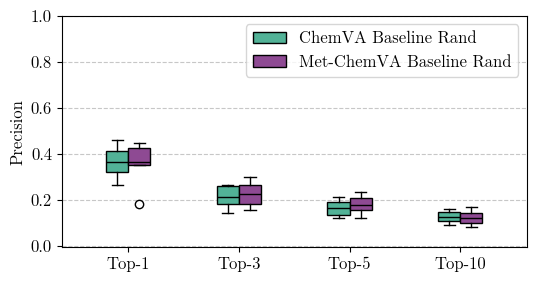

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


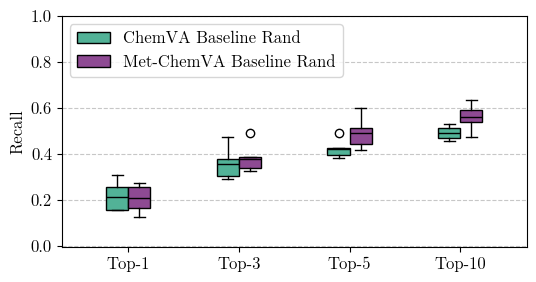

In [85]:
# Meta Comparison
bs = 4

recall_base, precision_base, score_one_base, score_all_base = score_result('../evaluation/alohomora/result_base_rand.csv', bs, False)
recall_metatrans, precision_metatrans, score_one_metatrans, score_all_metatrans = score_result('../evaluation/alohomora/result_metatrans.csv', bs, False)

precision = [precision_base[0:4], precision_metatrans[0:4]]
recall = [recall_base[0:4], recall_metatrans[0:4]]
score_one = [score_one_base[0:4], score_one_metatrans[0:4]]
score_all = [score_all_base[0:4], score_all_metatrans[0:4]]

xlabel = None
xticks = ['Top-1', 'Top-3', 'Top-5', 'Top-10']
labels = ['ChemVA Baseline Rand', 'Met-ChemVA Baseline Rand']

ylabel = 'Precision'
multi_boxplot(precision, xlabel, ylabel, xticks, labels, 'upper right', 'meta_precision', 1)

ylabel = 'Recall'
multi_boxplot(recall, xlabel, ylabel, xticks, labels, 'upper left', 'meta_recall', 1)

# ylabel = 'At Least One Metabolite'
# multi_boxplot(score_one, xlabel, ylabel, xticks, labels, 'lower right', 'at_least_baseline', 0.85)

# ylabel = 'All Metabolites'
# multi_boxplot(score_all, xlabel, ylabel, xticks, labels, 'upper left', 'all_baseline', 0.85)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


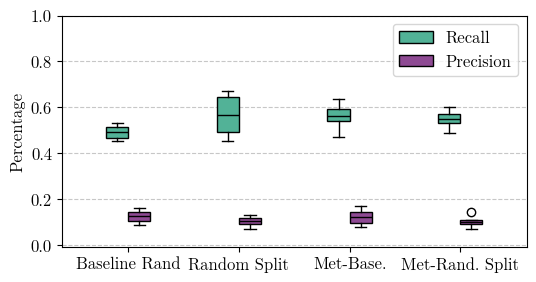

In [4]:
# Meta Ensemble Comparison
bs = 4

recall_base, precision_base, score_one_base, score_all_base = score_result('../evaluation/alohomora/result_base_rand.csv', bs, False)
recall_random, precision_random, score_one_random, score_all_random = score_result('../evaluation/alohomora/result_comb_random_split_5_per_model.csv', bs, False)
recall_metatrans, precision_metatrans, score_one_metatrans, score_all_metatrans = score_result('../evaluation/alohomora/result_metatrans.csv', bs, False)
recall_met_random, precision_met_random, score_one_met_random, score_all_met_random = score_result('../evaluation/alohomora/result_comb_metatrans_random_5_per_model.csv', bs, False)

recall_all = [recall_base[-2], recall_random[-1], recall_metatrans[-2], recall_met_random[-1]]
precision_all = [precision_base[-2], precision_random[-1], precision_metatrans[-2], precision_met_random[-1]]
score_one_all = [score_one_base[-2], score_one_random[-1], score_one_metatrans[-2], score_one_met_random[-1]]
score_all_all = [score_all_base[-2], score_all_random[-1], score_all_metatrans[-2], score_all_met_random[-1]]

xlabel = None
xticks = ['Baseline Rand', 'Random Split', 'Met-Base.', 'Met-Rand. Split']
labels = ['Recall', 'Precision']

data = [recall_all, precision_all]
ylabel = 'Percentage'
multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper right', 'meta_ensemble', 1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


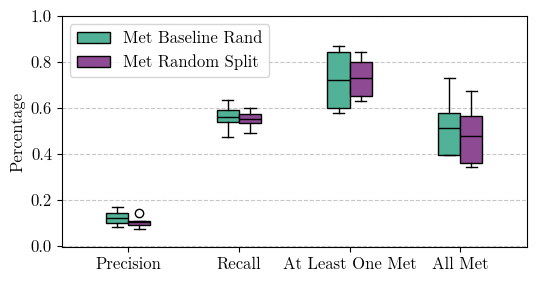

In [12]:
# Best Models
bs = 4

recall_base, precision_base, score_one_base, score_all_base = score_result('../evaluation/alohomora/result_metatrans.csv', bs, False)
recall_random, precision_random, score_one_random, score_all_random = score_result('../evaluation/alohomora/result_comb_metatrans_random_5_per_model.csv', bs, False)
# recall_base, precision_base, score_one_base, score_all_base = score_result('../evaluation/alohomora/result_base_rand.csv', bs, False)
# recall_random, precision_random, score_one_random, score_all_random = score_result('../evaluation/alohomora/result_comb_random_split_5_per_model.csv', bs, False)

base = [precision_base[-2], recall_base[-2], score_one_base[-2], score_all_base[-2]]
random = [precision_random[-1], recall_random[-1], score_one_random[-1], score_all_random[-1]]

xlabel = None
xticks = ['Precision', 'Recall', 'At Least One Met', 'All Met']
labels = ['Met Baseline Rand', 'Met Random Split']

ylabel = 'Percentage'
data = [base, random]
multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left', 'best_models', 1)

In [10]:
# Fingerprint
bs = 4

recall_base, precision_base, score_one_base, score_all_base = score_result('../evaluation/alohomora/result_base_rand.csv', bs, False)
recall_base_1, precision_base_1, score_one_base_1, score_all_base_1 = score_result('../evaluation/alohomora/result_base_rand.csv', bs, False, 1)
recall_base_08, precision_base_08, score_one_base_08, score_all_base_08 = score_result('../evaluation/alohomora/result_base_rand.csv', bs, False, 0.8)

precision = [precision_base[0:4], precision_base_1[0:4], precision_base_08[0:4]]
recall = [recall_base[0:4], recall_base_1[0:4], recall_base_08[0:4]]

xlabel = None
xticks = ['Top-1', 'Top-3', 'Top-5', 'Top-10']
labels = ['Exact', 'Similarity$\geq$1', 'Similarity$\geq$0.8']

# ylabel = 'Precision'
# multi_boxplot(precision, xlabel, ylabel, xticks, labels, 'upper right', 'fingerprint_precision', 1)

# ylabel = 'Recall'
# multi_boxplot(recall, xlabel, ylabel, xticks, labels, 'upper left', 'fingerprint_recall', 1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


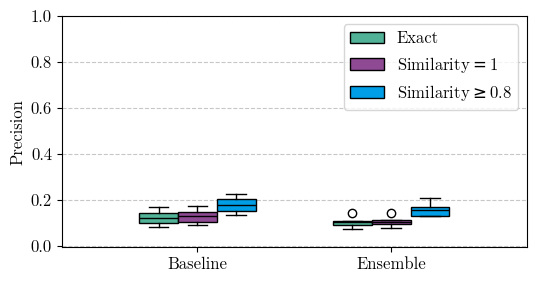

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


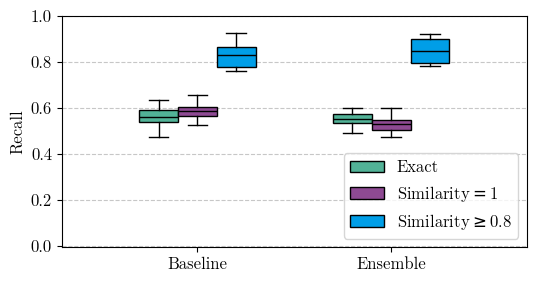

In [11]:
# Fingerprint Top-10
bs = 4

recall_base, precision_base, score_one_base, score_all_base = score_result('../evaluation/alohomora/result_metatrans.csv', bs, False)
recall_base_1, precision_base_1, score_one_base_1, score_all_base_1 = score_result('../evaluation/alohomora/result_metatrans.csv', bs, False, 1)
recall_base_08, precision_base_08, score_one_base_08, score_all_base_08 = score_result('../evaluation/alohomora/result_metatrans.csv', bs, False, 0.8)
recall_random, precision_random, score_one_random, score_all_random = score_result('../evaluation/alohomora/result_comb_metatrans_random_5_per_model.csv', bs, False)
recall_random_1, precision_random_1, score_one_random_1, score_all_random_1 = score_result('../evaluation/alohomora/result_comb_metatrans_random_5_per_model.csv', bs, False, 1)
recall_random_08, precision_random_08, score_one_random_08, score_all_random_08 = score_result('../evaluation/alohomora/result_comb_metatrans_random_5_per_model.csv', bs, False, 0.8)

precision_equal = [precision_base[-2], precision_random[-1]]
precision_equal_1 = [precision_base_1[-2], precision_random_1[-1]]
precision_equal_08 = [precision_base_08[-2], precision_random_08[-1]]

recall_equal = [recall_base[-2], recall_random[-1]]
recall_equal_1 = [recall_base_1[-2], recall_random_1[-2]]
recall_equal_08 = [recall_base_08[-2], recall_random_08[-1]]

xlabel = None
xticks = ['Baseline', 'Ensemble']
labels = ['Exact', 'Similarity$=$1', 'Similarity$\geq$0.8']

ylabel = 'Precision'
precision = [precision_equal, precision_equal_1, precision_equal_08]
multi_boxplot(precision, xlabel, ylabel, xticks, labels, 'upper right', 'fingerprint_ensemble_precision', 1)

ylabel = 'Recall'
recall = [recall_equal, recall_equal_1, recall_equal_08]
multi_boxplot(recall, xlabel, ylabel, xticks, labels, 'lower right', 'fingerprint_ensemble_recall', 1)